<a href="https://colab.research.google.com/github/kushal-ks/ML-Training/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 ! pip install -q kaggle

In [2]:
import tensorflow as tf
from google.colab import files
files.upload()
! mkfir ~/.kaggle


Saving kaggle.json to kaggle.json
/bin/bash: mkfir: command not found


In [0]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-03 22:53:52          45922  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           1937  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        334KB  2020-04-08 21:53:06           2206  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            494  
bappekim/air-pollution-in-seoul               

In [9]:
! kaggle competitions download -c covid19-global-forecasting-week-3

  0% 0.00/885k [00:00<?, ?B/s]
100% 885k/885k [00:00<00:00, 61.0MB/s]
  0% 0.00/118k [00:00<?, ?B/s]
100% 118k/118k [00:00<00:00, 37.3MB/s]
  0% 0.00/375k [00:00<?, ?B/s]
100% 375k/375k [00:00<00:00, 123MB/s]


In [6]:
!ls

covid19-in-india.zip  kaggle.json  sample_data


In [12]:
import csv
import datetime
time_step = []
covid19_cases = []

with open('./train.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    if row[2] == 'India':
      print("Row data ==========>>>>>", row)
      covid19_cases.append(float(row[4]))
      time_step.append(str(row[1])+" "+ row[2])
# import zipfile
# import csv
# import datetime

# local_zip = './covid19-in-india.zip' 
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./')
# zip_ref.close()

Row data ==========>>>>> ['14874', '', 'India', '2020-01-22', '0.0', '0.0']
Row data ==========>>>>> ['14875', '', 'India', '2020-01-23', '0.0', '0.0']
Row data ==========>>>>> ['14876', '', 'India', '2020-01-24', '0.0', '0.0']
Row data ==========>>>>> ['14877', '', 'India', '2020-01-25', '0.0', '0.0']
Row data ==========>>>>> ['14878', '', 'India', '2020-01-26', '0.0', '0.0']
Row data ==========>>>>> ['14879', '', 'India', '2020-01-27', '0.0', '0.0']
Row data ==========>>>>> ['14880', '', 'India', '2020-01-28', '0.0', '0.0']
Row data ==========>>>>> ['14881', '', 'India', '2020-01-29', '0.0', '0.0']
Row data ==========>>>>> ['14882', '', 'India', '2020-01-30', '1.0', '0.0']
Row data ==========>>>>> ['14883', '', 'India', '2020-01-31', '1.0', '0.0']
Row data ==========>>>>> ['14884', '', 'India', '2020-02-01', '1.0', '0.0']
Row data ==========>>>>> ['14885', '', 'India', '2020-02-02', '2.0', '0.0']
Row data ==========>>>>> ['14886', '', 'India', '2020-02-03', '3.0', '0.0']
Row data ===

In [14]:
time_step = []
covid19_cases = []

with open('./train.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    if row[2] == 'India':
      covid19_cases.append(float(row[4]))
      time_step.append(float(row[0]))
print(len(covid19_cases))

# time_step = []
# covid19_cases = []

# with open('./covid_19_india.csv') as csvfile:
#   reader = csv.reader(csvfile, delimiter=',')
#   next(reader)
#   for row in reader:
#     value = 0
    
#     if row[5] != '-':
#       value = float(row[8])
#     covid19_cases.append(value)

#     time_step.append(str(row[1])+" "+ row[2])
# print(time_step)

77


In [0]:
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format='-', start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)


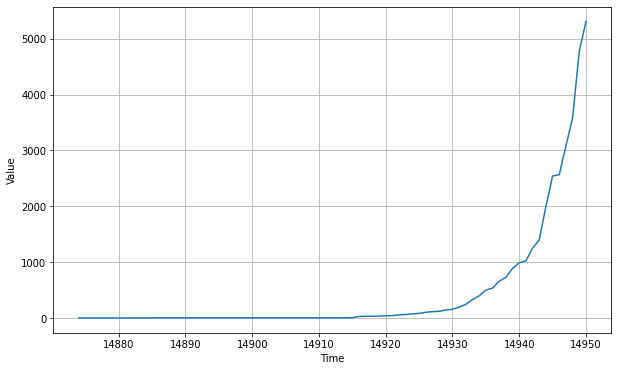

In [16]:
series = np.array(covid19_cases)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [17]:
split_time=50
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
print(len(time_valid))

print(len(x_train))
window_size = 5
batch_size = 5
shuffle_buffer_size = 5


27
50


In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  for x,y in dataset:
    print(x.numpy(), y.numpy())
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset
 

In [19]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_shape=[4], activation="relu"), 
    tf.keras.layers.Dense(2, activation="relu"), 

    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
model.fit(dataset,epochs=500,verbose=1)


[0. 0. 0. 0.] 0.0
[0. 0. 0. 0.] 0.0
[0. 0. 0. 1.] 1.0
[0. 0. 0. 0.] 0.0
[0. 0. 0. 0.] 0.0
[0. 0. 0. 0.] 1.0
[0. 0. 1. 1.] 1.0
[1. 1. 2. 3.] 3.0
[3. 3. 3. 3.] 3.0
[1. 2. 3. 3.] 3.0
[1. 1. 1. 2.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[0. 1. 1. 1.] 2.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[2. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 3.0
[3. 3. 3. 3.] 5.0
[3. 3. 3. 3.] 3.0
[ 5.  5. 28. 30.] 31.0
[3. 3. 3. 5.] 5.0
[28. 30. 31. 34.] 39.0
[ 5. 28. 30. 31.] 34.0
[30. 31. 34. 39.] 43.0
[31. 34. 39. 43.] 56.0
[3. 3. 5. 5.] 28.0
[34. 39. 43. 56.] 62.0
[3. 3. 3. 3.] 3.0
[ 3.  5.  5. 28.] 30.0
Epoch 1/500
10/10 [==============================] - 0s 6ms/step - loss: 624.0402
Epoch 2/500
10/10 [==============================] - 0

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 1.]]
[[0. 0. 1. 1.]]
[[0. 1. 1. 1.]]
[[1. 1. 1. 2.]]
[[1. 1. 2. 3.]]
[[1. 2. 3. 3.]]
[[2. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 3.]]
[[3. 3. 3. 5.]]
[[3. 3. 5. 5.]]
[[ 3.  5.  5. 28.]]
[[ 5.  5. 28. 30.]]
[[ 5. 28. 30. 31.]]
[[28. 30. 31. 34.]]
[[30. 31. 34. 39.]]
[[31. 34. 39. 43.]]
[[34. 39. 43. 56.]]
[[39. 43. 56. 62.]]
[[43. 56. 62. 73.]]
[[56. 62. 73. 82.]]
[[ 62.  73.  82. 102.]]
[[ 73.  82. 102. 113.]]
[[ 82. 102. 113. 119.]]
[[102. 113. 119. 142.]]
[[113. 119. 142. 156.]]
[[119. 142. 156. 194.]]
[[142. 156. 194. 244.]]
[[156. 1

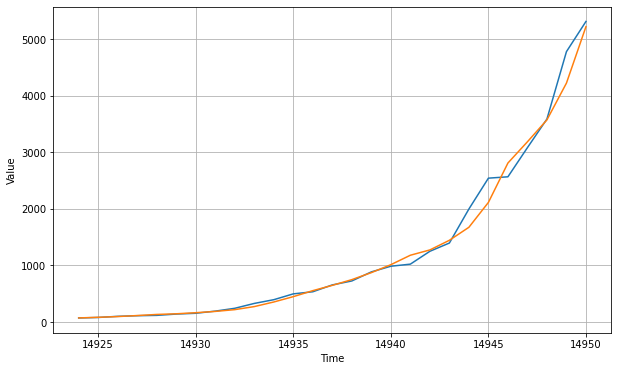

In [21]:
forcast = []
for time in range(len(series) - 4):
  print(series[time:time + 4][np.newaxis])
  forcast.append(model.predict(series[time:time + 4][np.newaxis]))
forcast =  forcast[split_time - 4:]
results = np.array(forcast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [22]:

tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

85.121544